In [1]:
import numpy as np
import sympy as sp

# Exercise 3.1

$\xi(\omega) = \frac{1}{2} \sigma^2 - r_{xd} \omega + \frac{1}{2}r_x \omega^2$

The gradient vector $g(n) = - r_{xd} + r_x \omega$

The cost function $\xi(\omega) (n+1)$ by the steepest descent algorithm is given by:

 $\xi(\omega (n+1)) = \xi(\omega(n)) - \eta g(n)^2$. After substituting the value of $g(n)$, this is equal to:
 
 $\xi(\omega(n+1)) = \xi(\omega(n)) - \eta (- r_{xd} + r_x \omega(n))^2$
 
 = $ (\frac{1}{2} \sigma^2 - r_{xd} \omega(n) + \frac{1}{2}r_x \omega(n)^2)-  \eta (- r_{xd} + r_x \omega(n))^2$
 
 =$ (\eta r^{2}_x + \frac{1}{2}r_x)\omega(n)^2 -(2\eta r_{xd}r_x  +r_{xd}) \omega(n)+ (\eta r^{2}_{xd} + \frac{1}{2} \sigma^2) $

# Exercise 3.2

In [2]:
wo,w1 = sp.symbols("w0,w1")

w = sp.Matrix([wo,w1])
r = sp.Matrix([0.8182,0.354])
R = sp.Matrix([[1,0.8182],
               [0.8182,1]])
print "The weight vector w ="
sp.pprint(w)
print "\n r_xd = "
sp.pprint(r)
print "\nAnd R_x = "
sp.pprint(R)


The weight vector w =
⎡w₀⎤
⎢  ⎥
⎣w₁⎦

 r_xd = 
⎡0.8182⎤
⎢      ⎥
⎣0.354 ⎦

And R_x = 
⎡  1     0.8182⎤
⎢              ⎥
⎣0.8182    1   ⎦


$\xi(\omega) = \frac{1}{2}\sigma^{2} - r_{xd}^T \omega + \frac{1}{2}\omega^T R_x \omega$.

Substituting the values of $r_{xd}$ and $R_x$, the values of $ r_{xd}^T \omega$ and $\frac{1}{2}\omega^T R_x \omega$ is :

In [3]:
rw = r.T * w
sp.pprint(rw)

[0.8182⋅w₀ + 0.354⋅w₁]


In [4]:
w_tRw = 0.5*w.T*R*w
sp.pprint(w_tRw)

[w₀⋅(0.5⋅w₀ + 0.4091⋅w₁) + w₁⋅(0.4091⋅w₀ + 0.5⋅w₁)]


Thus $\xi(\omega) = \frac{1}{2}\sigma^{2} - [0.8182⋅\omega_0 + 0.354⋅\omega_1] + [\omega_0⋅(0.5⋅\omega_0 + 0.4091⋅\omega_1) + \omega_1⋅(0.4091⋅\omega_0 + 0.5⋅\omega_1)]$

 $\xi(\omega) = \frac{1}{2}\sigma^{2} + 0.5.\omega_0^{2} + 0.5.\omega_1^{2} + 0.8182.\omega_0.\omega_1 - 0.8182.\omega_0 - 0.354.\omega_1$



In [5]:
sigma = sp.Symbol('sigma')
xi = 0.5*sigma**2 + (0.5*wo**2) + (0.5*w1**2) + (0.8182*wo*w1) - (0.8182*wo) - (0.354*w1)
eqn1 = sp.diff(xi,wo)
eqn2 = sp.diff(xi,w1)
gradient = sp.Matrix([eqn1,eqn2])
print "Gradient :"
sp.pprint(gradient)

Gradient :
⎡1.0⋅w₀ + 0.8182⋅w₁ - 0.8182⎤
⎢                           ⎥
⎣0.8182⋅w₀ + 1.0⋅w₁ - 0.354 ⎦


In [6]:

w_optimal = sp.solve([eqn1,eqn2],[wo,w1])
print "The optimal weight vector = ",w_optimal

The optimal weight vector =  {w0: 1.59902944424901, w1: -0.954325891284541}


# Part (b)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


def steepest_descent(eta, xi , gradient):
    w_init = np.array([0,0])
    
    w_n = w_init.T
    xi_n = xi.subs({wo:w_n[0],w1:w_n[1]})
    gradient_n = gradient.subs({wo:w_n[0],w1:w_n[1]})
    
    w_0 = []
    w_1 = []

    for i in range(200):
        eta_gn  =  np.asarray(eta*gradient_n)
        w_new = w_n - np.array([eta_gn[0,0],eta_gn[1,0]])
        #Update the weight vector, the gradient and corresponding value of xi
        
        gradient_n = gradient.subs({wo:w_new[0],w1:w_new[1]})
        xi_new = xi.subs({wo:w_new[0],w1:w_new[1]})
        
        xi_n = xi_new
        w_n = w_new
        
        w_0.append(w_n[0])
        w_1.append(w_n[1])
        
    w_0 = np.asarray(w_0)
    w_1 = np.asarray(w_1)
    print w_0,w_1
    plt.plot(w_0,w_1)
    plt.xlabel('w0 -->')
    plt.ylabel('w1 -->')
    return w_n    

[0.245460000000000 0.391214148000000 0.489783670323336 0.565143245616243
 0.628286459092980 0.684301226568200 0.735586143660271 0.783312715525325
 0.828090254381939 0.870268343711763 0.910074548835830 0.947677227916150
 0.983214286322007 1.01680643975324 1.04856342544151 1.07858699801297
 1.10697245443607 1.13380948147823 1.15918268679997 1.18317197829257
 1.20585286691344 1.22729672763557 1.24757103463336 1.26673957839999
 1.28486266864075 1.30199732501758 1.31819745699826 1.33351403367282
 1.34799524420651 1.36168664949540 1.37463132552971 1.38686999892850
 1.39844117507802 1.40938125927940 1.41972467128800 1.42950395360546
 1.43874987386523 1.44749152163400 1.45575639993344 1.46357051177042
 1.47095844194780 1.47794343441331 1.48454746538975 1.49079131251674
 1.49669462022141 1.50227596152388 1.50755289647171 1.51254202738748
 1.51725905110311 1.52171880834529 1.52593533042748 1.52992188339530
 1.53369100976426 1.53725456798106 1.54062376973272 1.54380921522084
 1.54682092651203 1.5

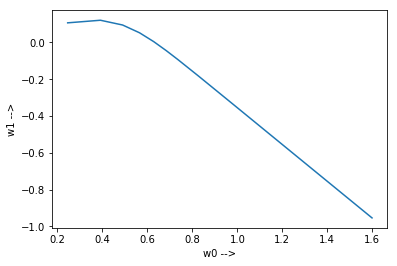

In [8]:
#Learning rate = 0.3
sp.pprint(steepest_descent(0.3,xi,gradient))

[1.59902944424901 -0.954325891284542]


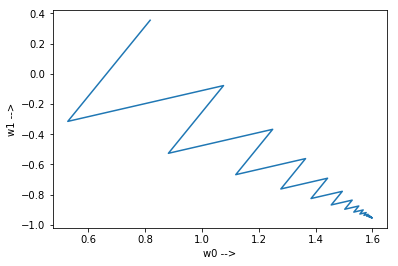

In [13]:
#Learning rate = 1.0
sp.pprint(steepest_descent(1.0,xi,gradient))